In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [2]:
!ls -R /kaggle/input/cone-detection-using-yolov5/yolov5/runs


/kaggle/input/cone-detection-using-yolov5/yolov5/runs:
train

/kaggle/input/cone-detection-using-yolov5/yolov5/runs/train:
fsoco_yolov5s_exp1_sushi

/kaggle/input/cone-detection-using-yolov5/yolov5/runs/train/fsoco_yolov5s_exp1_sushi:
confusion_matrix.png				  results.png
events.out.tfevents.1753870975.00e2b97403e3.70.0  train_batch0.jpg
F1_curve.png					  train_batch1.jpg
hyp.yaml					  train_batch2.jpg
labels_correlogram.jpg				  val_batch0_labels.jpg
labels.jpg					  val_batch0_pred.jpg
opt.yaml					  val_batch1_labels.jpg
P_curve.png					  val_batch1_pred.jpg
PR_curve.png					  val_batch2_labels.jpg
R_curve.png					  val_batch2_pred.jpg
results.csv					  weights

/kaggle/input/cone-detection-using-yolov5/yolov5/runs/train/fsoco_yolov5s_exp1_sushi/weights:
best.pt  last.pt


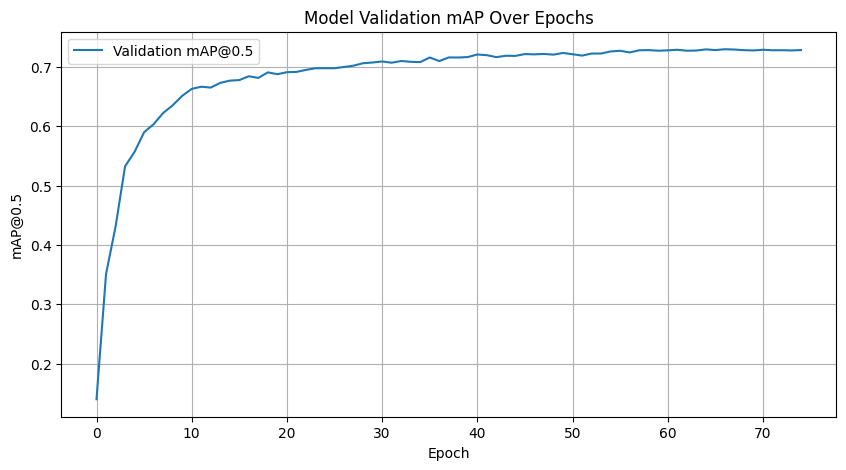

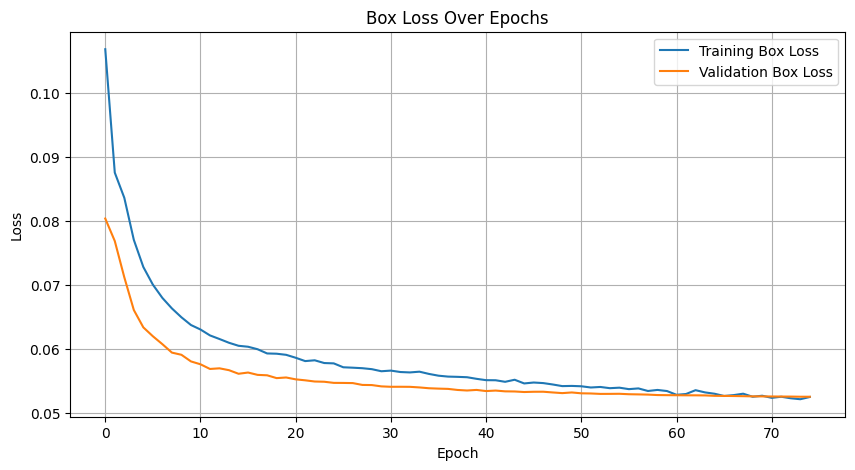

In [3]:
results_path = "/kaggle/input/cone-detection-using-yolov5/yolov5/runs/train/fsoco_yolov5s_exp1_sushi/"

import matplotlib.pyplot as plt
results_df = pd.read_csv(results_path + "results.csv")

results_df.columns = results_df.columns.str.strip() # stripping col names with whitespace

# Plotting the mAP (Mean Average Precision)
plt.figure(figsize=(10, 5))
plt.plot(results_df['epoch'], results_df['metrics/mAP_0.5'], label='Validation mAP@0.5')
plt.title('Model Validation mAP Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('mAP@0.5')
plt.grid(True)
plt.legend()
plt.show()

# Plotting the losses
plt.figure(figsize=(10, 5))
plt.plot(results_df['epoch'], results_df['train/box_loss'], label='Training Box Loss')
plt.plot(results_df['epoch'], results_df['val/box_loss'], label='Validation Box Loss')
plt.title('Box Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

Confusion Matrix:


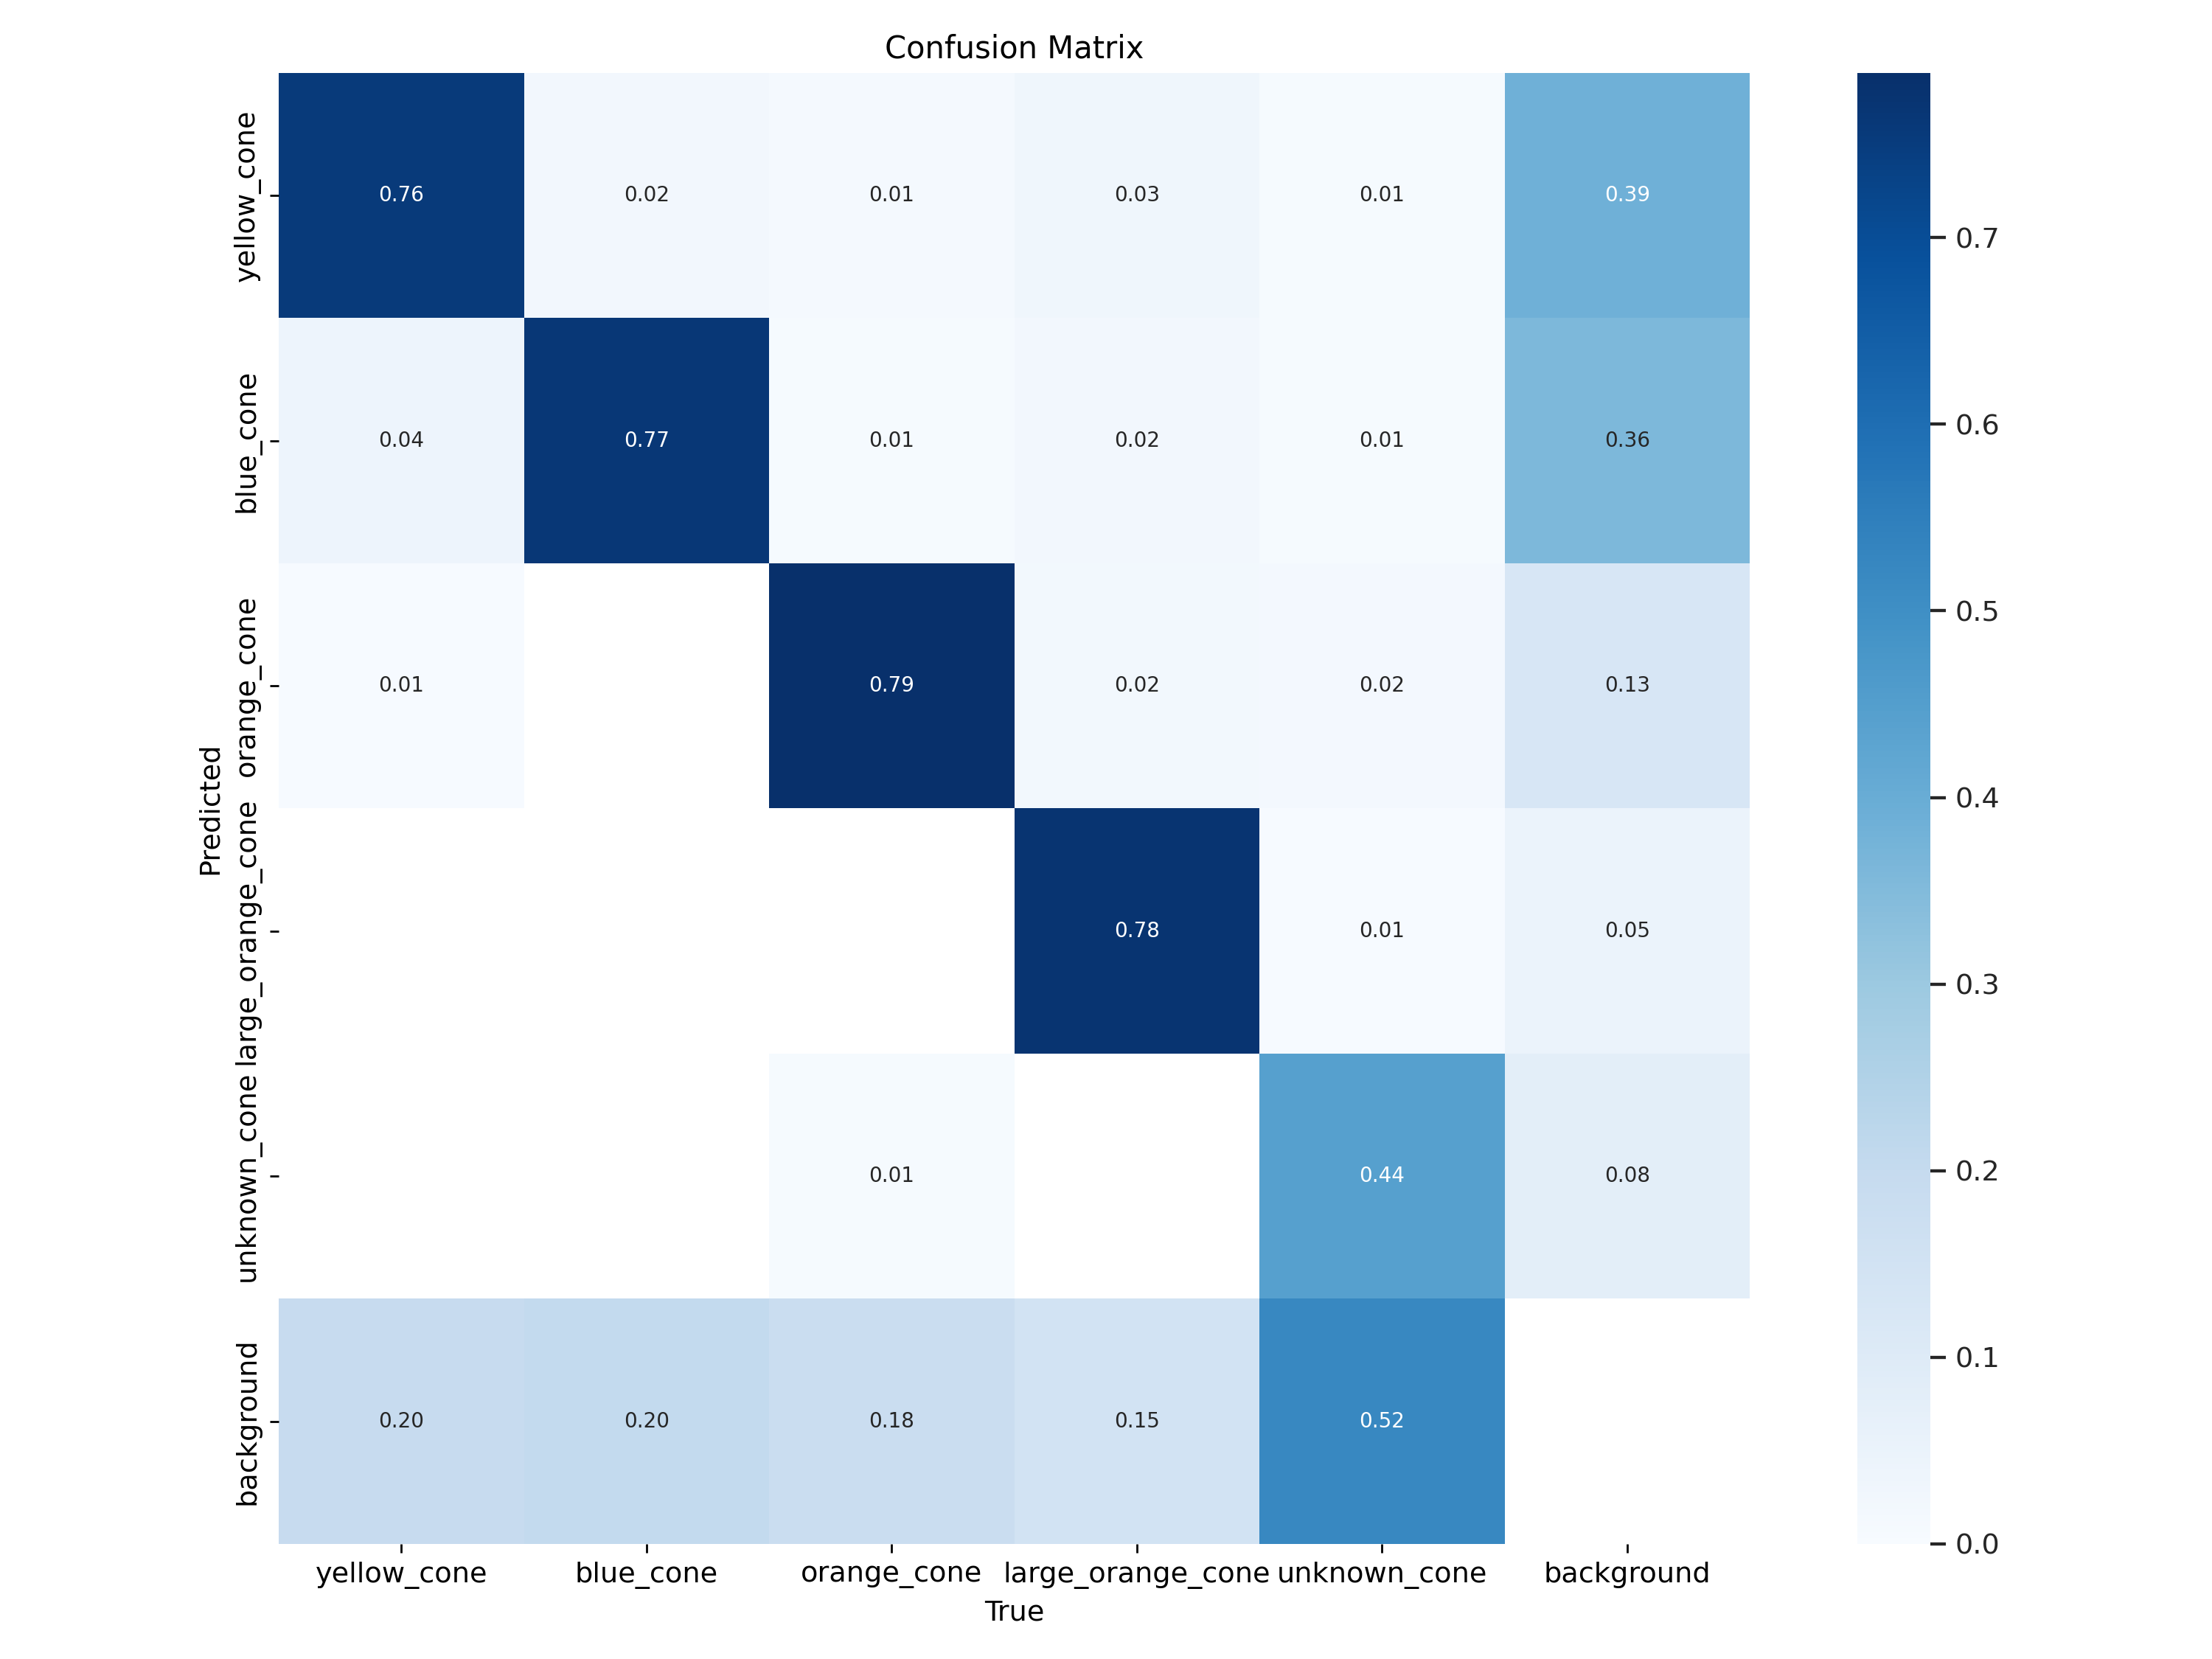


F1-Score Curve:


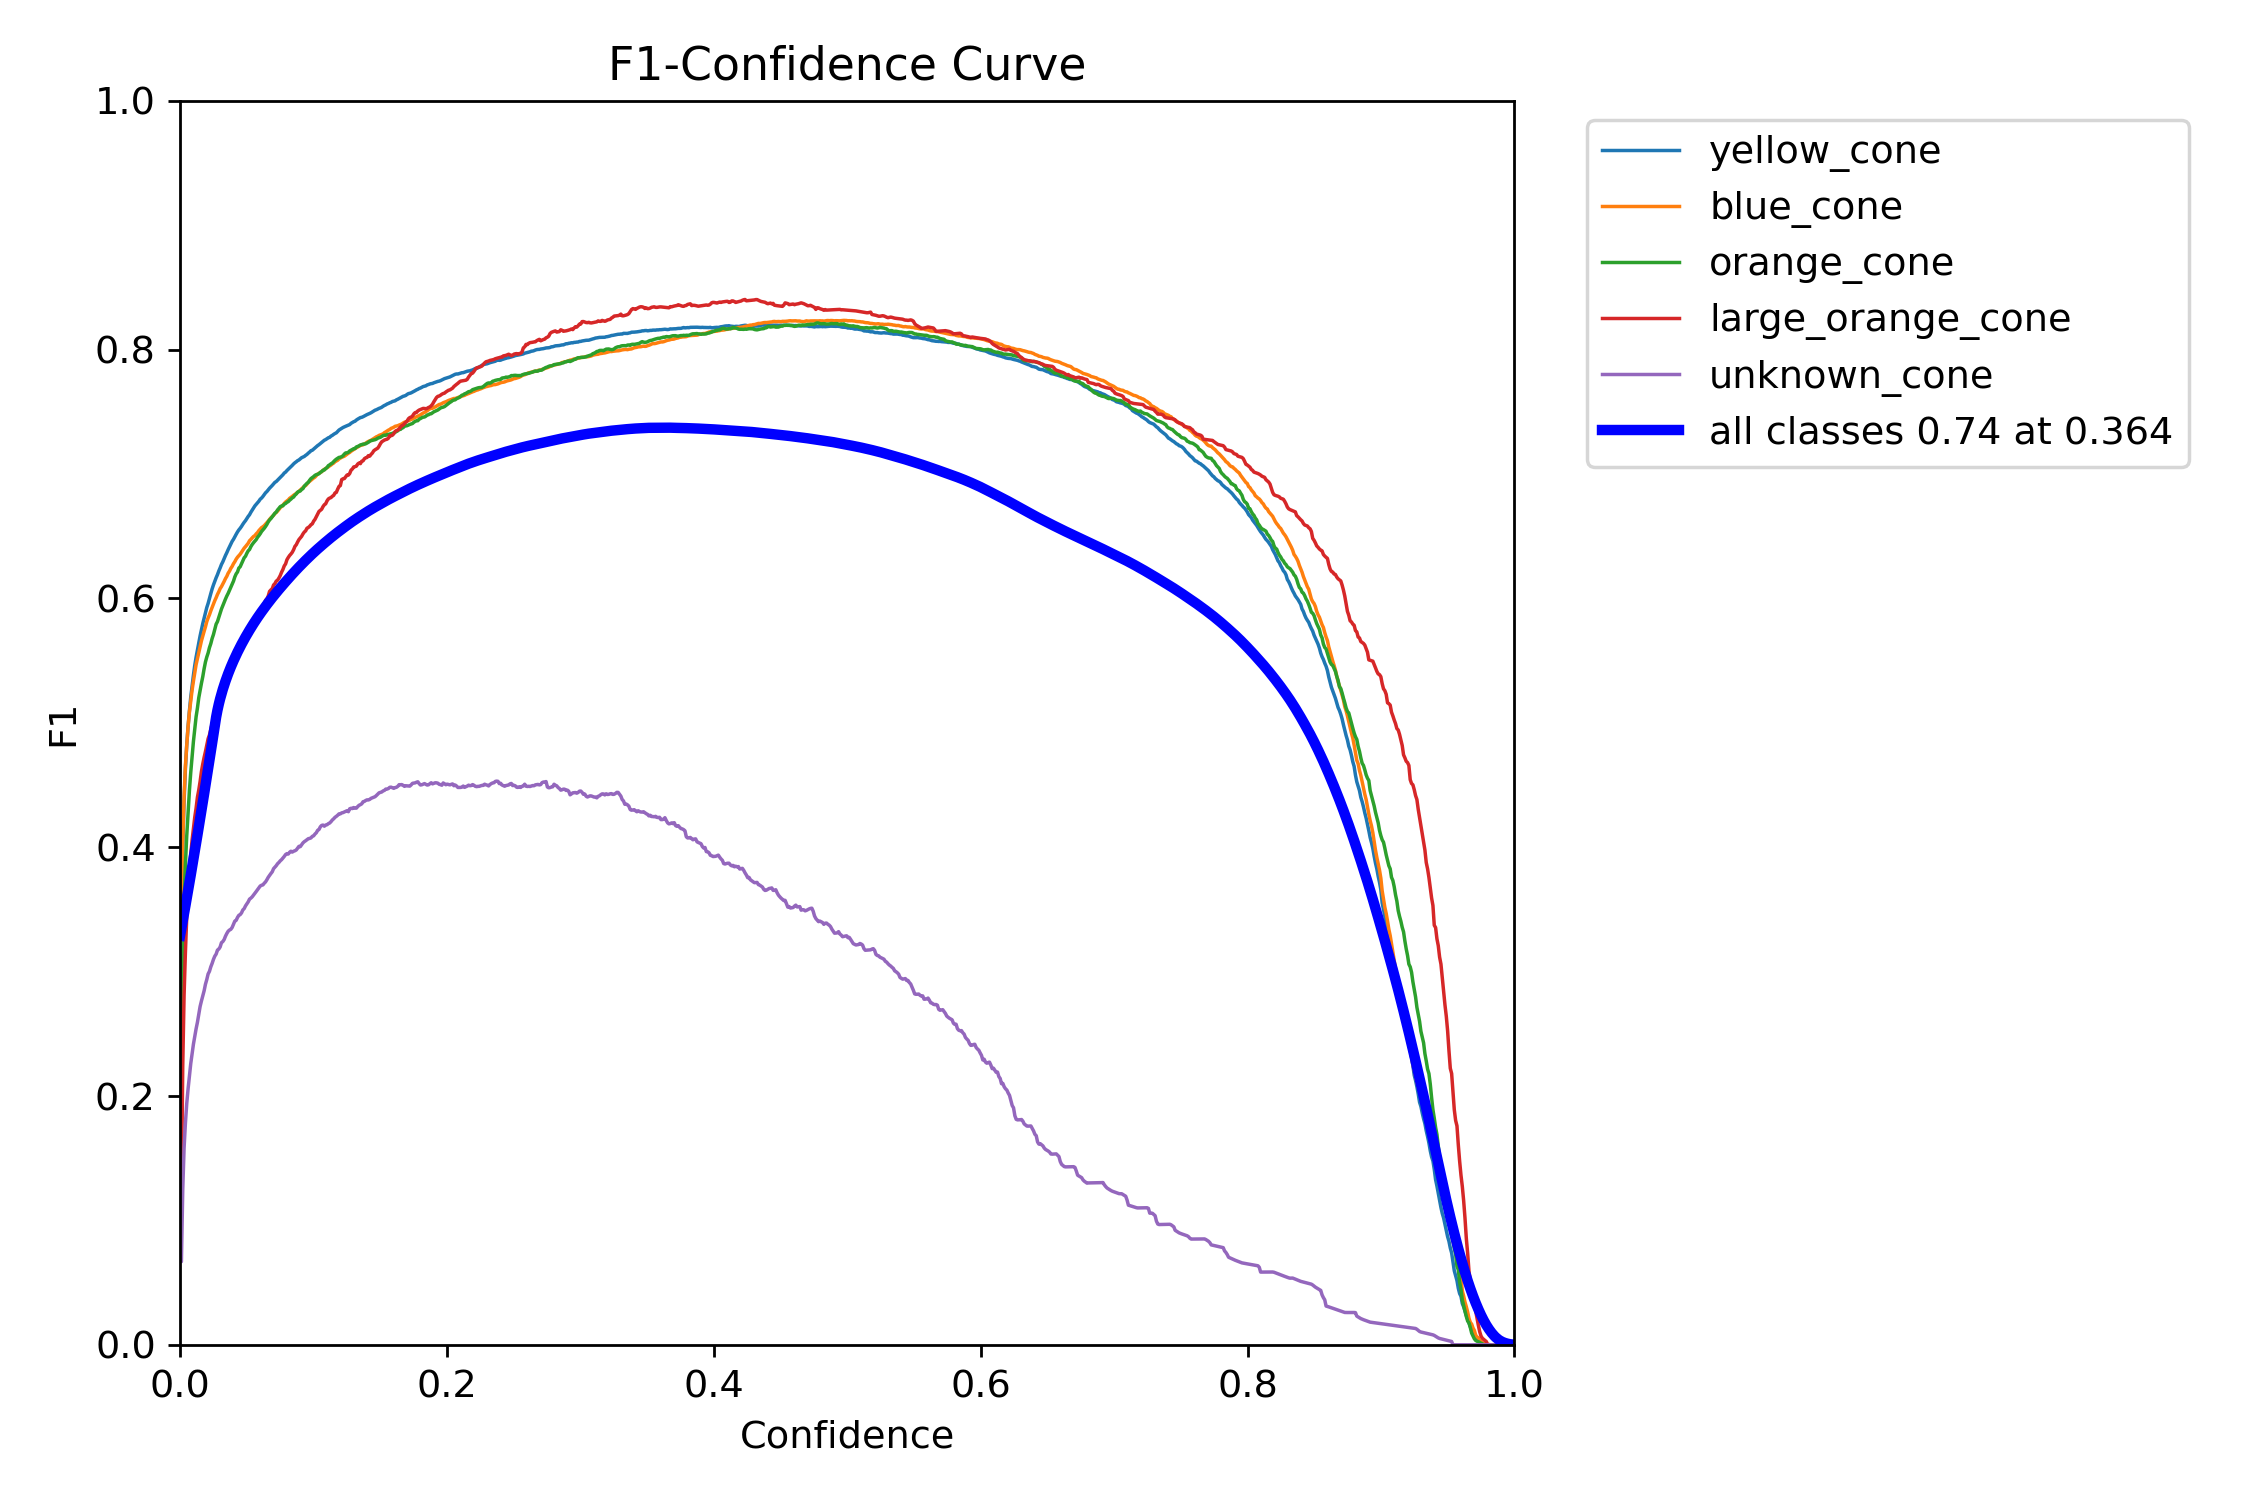

In [4]:
from IPython.display import Image

# Display the confusion matrix
print("Confusion Matrix:")
display(Image(filename=results_path + 'confusion_matrix.png', width=600))

# Display the F1 score curve
print("\nF1-Score Curve:")
display(Image(filename=results_path + 'F1_curve.png', width=600))

In [5]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17521, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 17521 (delta 9), reused 0 (delta 0), pack-reused 17497 (from 4)
Receiving objects: 100% (17521/17521), 16.66 MiB | 32.12 MiB/s, done.
Resolving deltas: 100% (12001/12001), done.
/kaggle/working/yolov5


In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [7]:
!python detect.py \
--weights {results_path + 'weights/best.pt'} \
--source /kaggle/input/fsoco-split/data_split/test/images \
--conf 0.4 \
--name final_analysis_inference

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
detect: weights=['/kaggle/input/cone-detection-using-yolov5/yolov5/runs/train/fsoco_yolov5s_exp1_sushi/weights/best.pt'], source=/kaggle/input/fsoco-split/data_split/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=final_analysis_inference, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-423-g567c6646 Python-3.11.13 torch-2.6.0+cu124 CUD

Created destination folder: 'inference_examples'
  - Copied 'BME_00044.jpg' and its prediction.


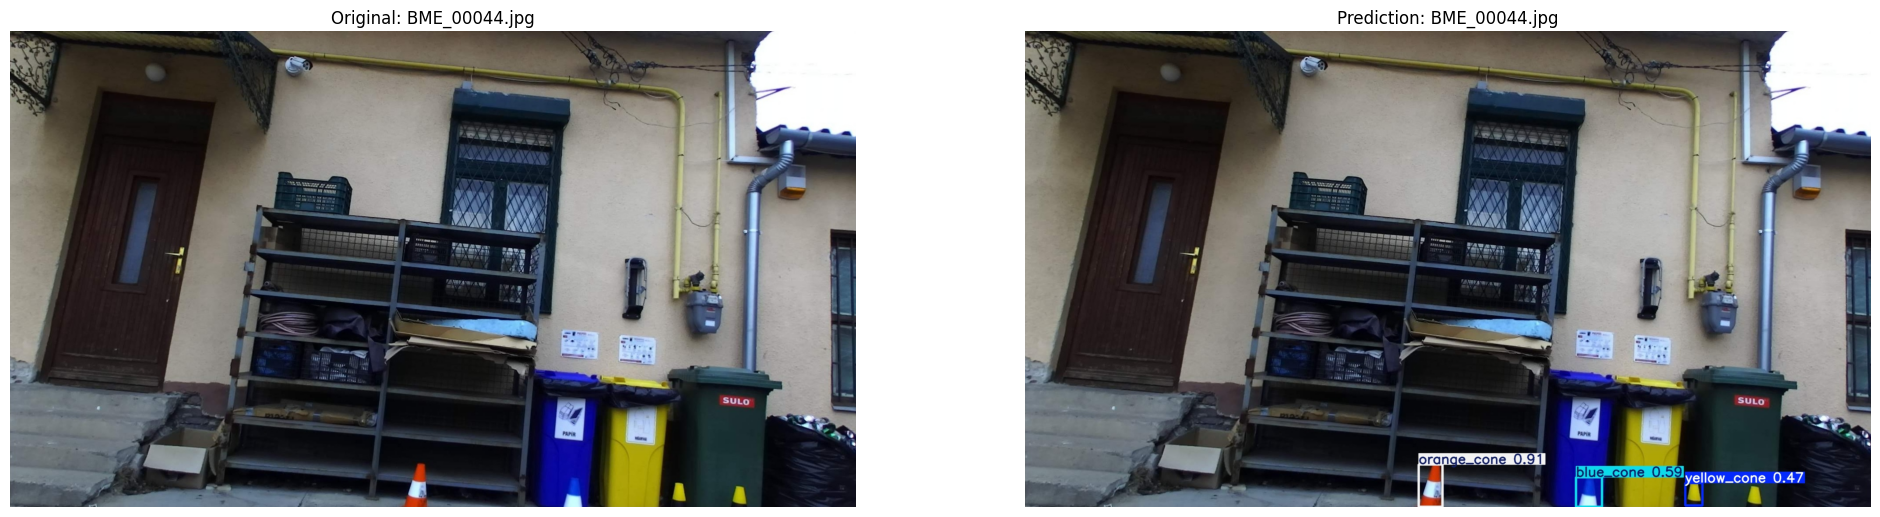

  - Copied 'BME_00047.jpg' and its prediction.


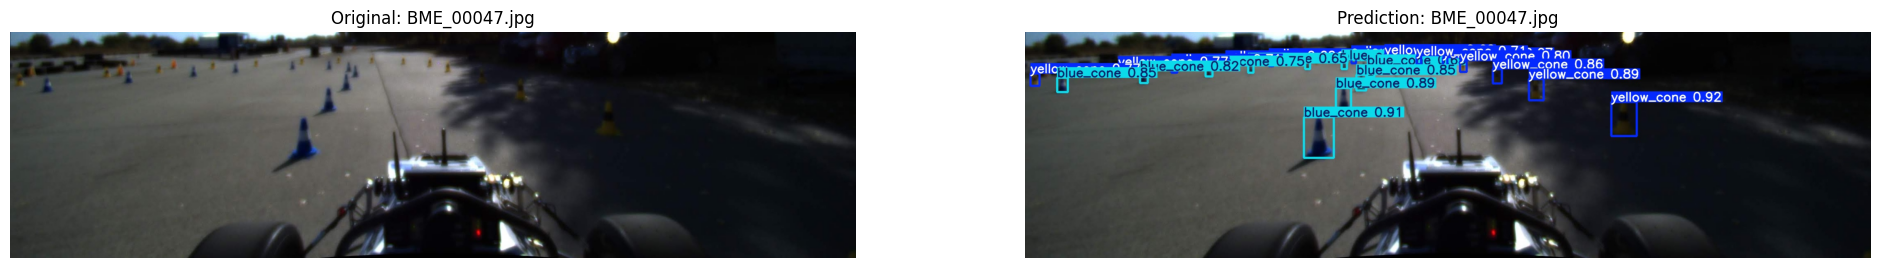

  - Copied 'BME_00054.jpg' and its prediction.


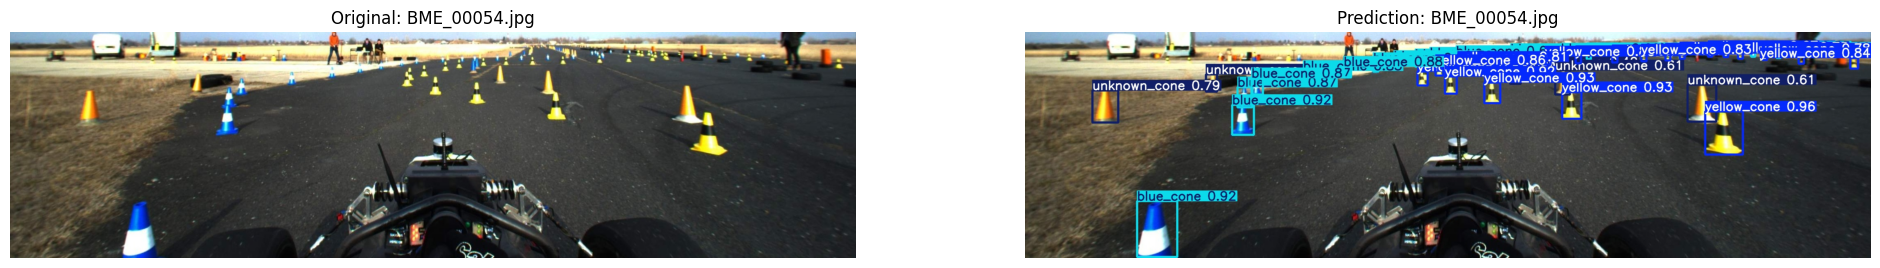

  - Copied 'BME_00063.jpg' and its prediction.


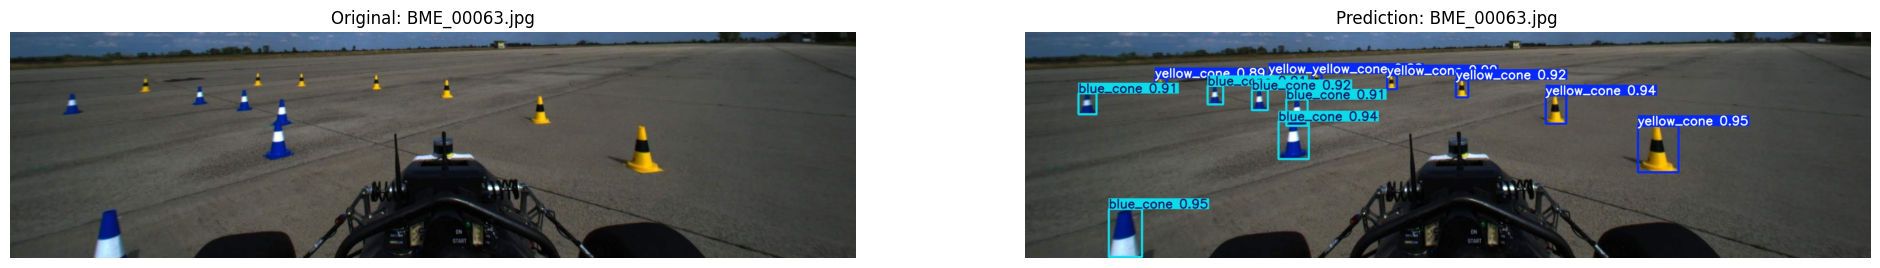

  - Copied 'BME_00066.jpg' and its prediction.


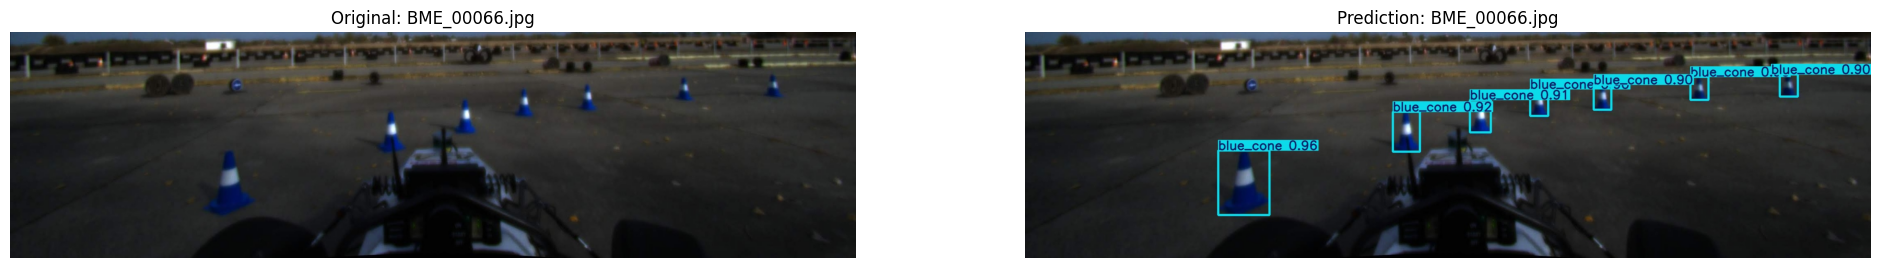

  - Copied 'BME_00071.jpg' and its prediction.


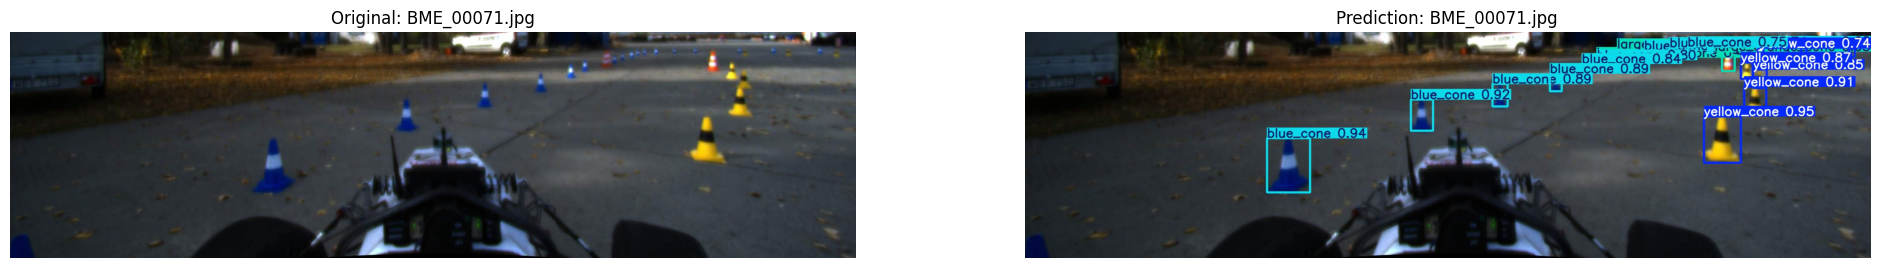

  - Copied 'BME_00079.jpg' and its prediction.


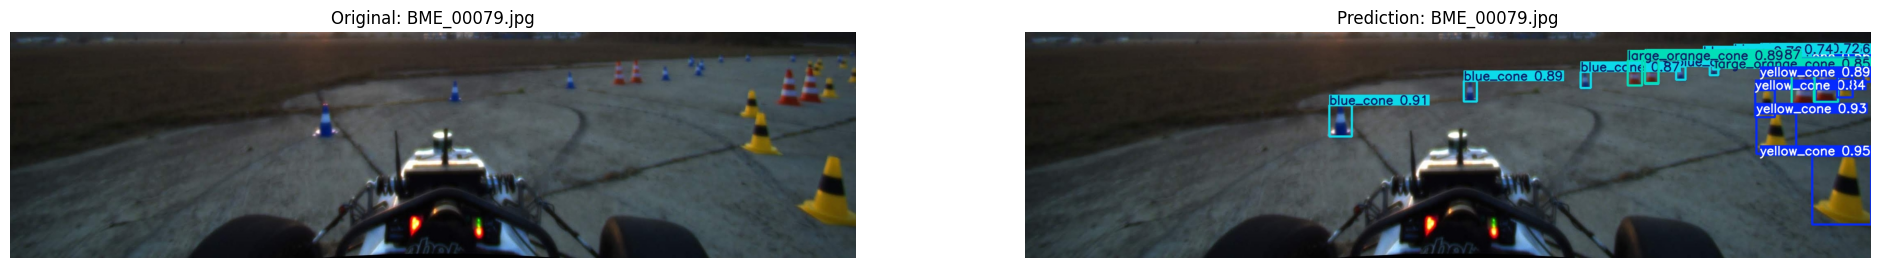

  - Copied 'BME_00081.jpg' and its prediction.


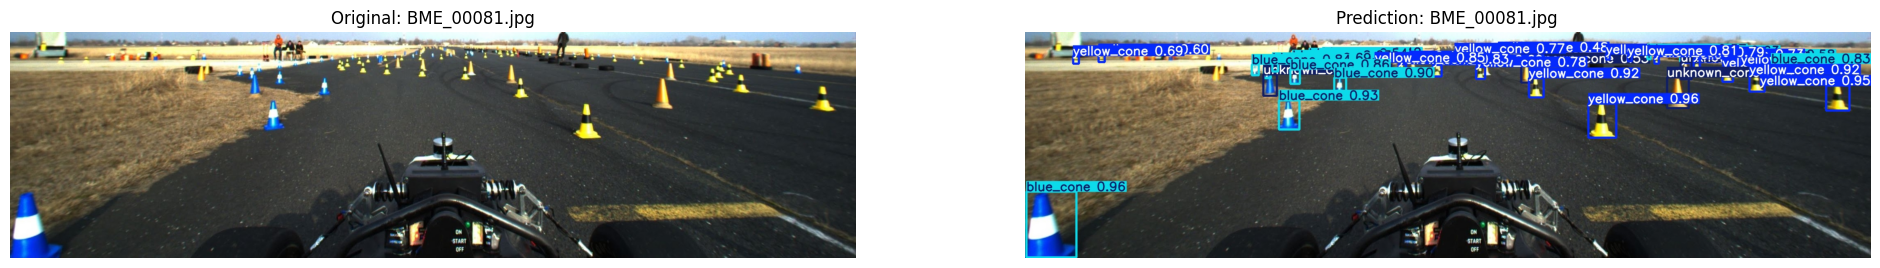

  - Copied 'BME_00082.jpg' and its prediction.


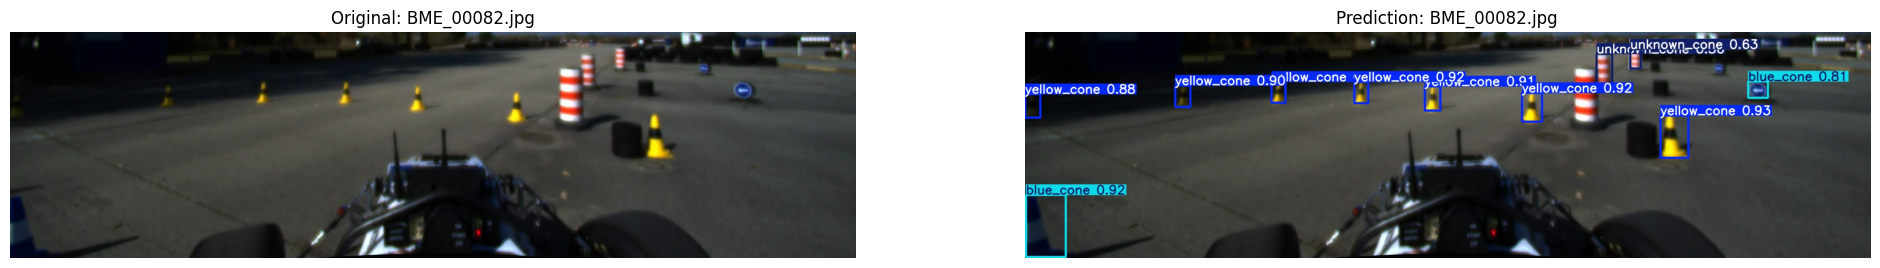

  - Copied 'BME_00115.jpg' and its prediction.


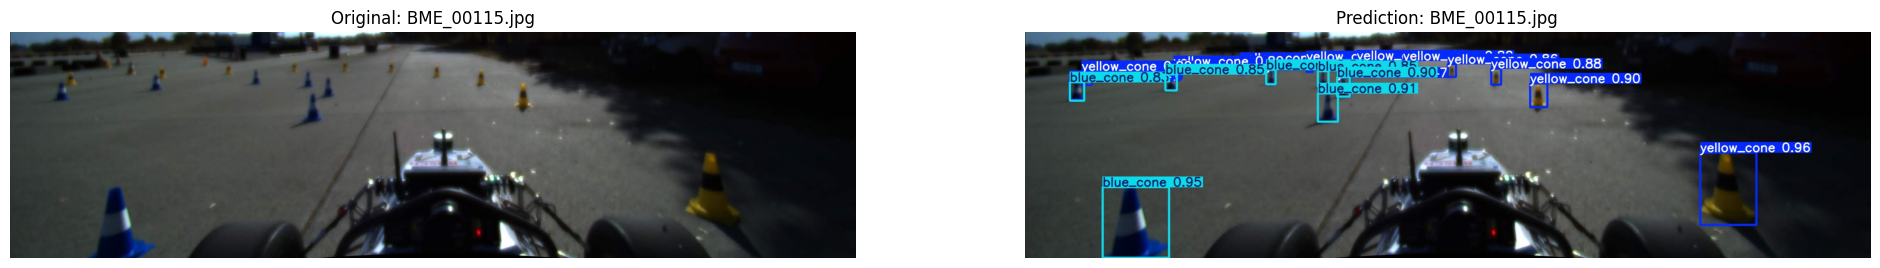

  - Copied 'BME_00141.jpg' and its prediction.


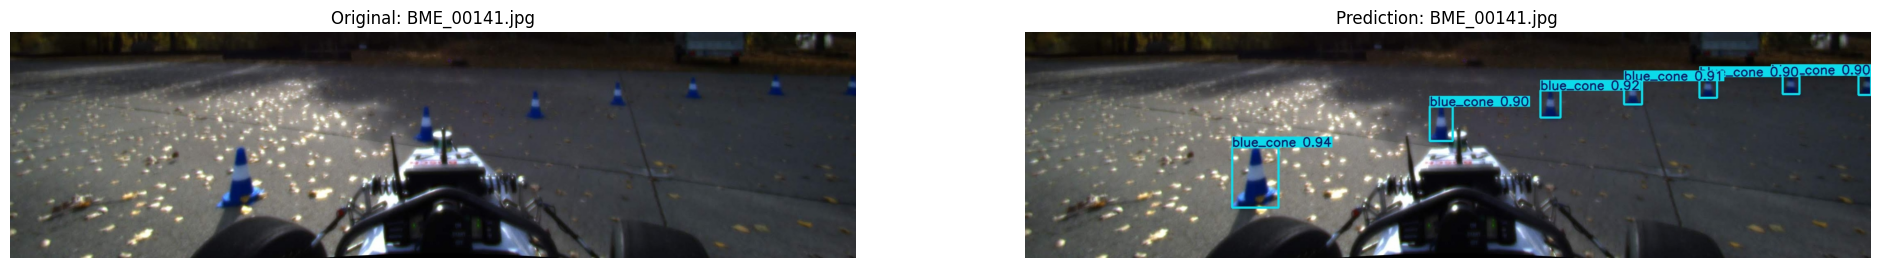


Script finished. Your inference examples are ready!


In [8]:
import os
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Image


original_images_path = "/kaggle/input/fsoco-split/data_split/test/images/"

prediction_results_path = "//kaggle/working/yolov5/runs/detect/final_analysis_inference/"

# Name of the new folder you want to create
destination_folder = "inference_examples"

# Add the exact filenames of the images you want to include
sample_image_files = [
    "BME_00044.jpg",
    "BME_00047.jpg",
    "BME_00054.jpg",
    "BME_00063.jpg",
    "BME_00066.jpg",
    "BME_00071.jpg",
    "BME_00079.jpg",
    "BME_00081.jpg",
    "BME_00082.jpg",
    "BME_00115.jpg",
    "BME_00141.jpg",
    
]


# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)
print(f"Created destination folder: '{destination_folder}'")

# Loop through your chosen files and copy them
for filename in sample_image_files:
    # Define source paths for original and predicted images
    original_src_path = os.path.join(original_images_path, filename)
    predicted_src_path = os.path.join(prediction_results_path, filename)

    # Check if the files exist before trying to copy
    if os.path.exists(original_src_path) and os.path.exists(predicted_src_path):
        # --- File Copying Logic (Unchanged) ---
        base, ext = os.path.splitext(filename)
        predicted_dest_filename = f"{base}_prediction{ext}"
        shutil.copy2(original_src_path, os.path.join(destination_folder, filename))
        shutil.copy2(predicted_src_path, os.path.join(destination_folder, predicted_dest_filename))
        print(f"  - Copied '{filename}' and its prediction.")

        # --- NEW: Display images side-by-side ---
        fig, ax = plt.subplots(1, 2, figsize=(24, 9)) # Create a figure with 2 subplots

        # Display original image
        original_img = mpimg.imread(original_src_path)
        ax[0].imshow(original_img)
        ax[0].set_title(f'Original: {filename}')
        ax[0].axis('off') # Hide axes ticks

        # Display predicted image
        predicted_img = mpimg.imread(predicted_src_path)
        ax[1].imshow(predicted_img)
        ax[1].set_title(f'Prediction: {filename}')
        ax[1].axis('off') # Hide axes ticks

        plt.show() # Show the plot for the current pair of images
        # --- End of New Code ---
        
    else:
        print(f"  - SKIPPED: Could not find '{filename}' in source folders.")

print("\nScript finished. Your inference examples are ready!")